## エッジに角度を紐付ける

In [166]:
import numpy as np
import pandas as pd
import os,pickle, gc
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [2]:
train = pd.read_pickle("../pickle/train.pkl")

In [3]:
test = pd.read_pickle("../pickle/test.pkl")

In [4]:
st = pd.read_pickle("../pickle/structures.pkl")

In [5]:
ls ../data/graph/ | head

dataset-metadata.json
dsgdb9nsd_000001.pickle
dsgdb9nsd_000002.pickle
dsgdb9nsd_000003.pickle
dsgdb9nsd_000004.pickle
dsgdb9nsd_000005.pickle
dsgdb9nsd_000007.pickle
dsgdb9nsd_000008.pickle
dsgdb9nsd_000009.pickle
dsgdb9nsd_000010.pickle


## 試しに一つの分子で作ってみる

In [147]:
molecule_name = "dsgdb9nsd_072485"
with open(f"../data/graph_v2/{molecule_name}.pickle","rb") as f:
    data = pickle.load(f)

In [148]:
xyz = st[st.molecule_name == molecule_name]

In [149]:
xyz

,molecule_name,atom_index,atom,x,y,z
1217869,dsgdb9nsd_072485,0,C,-0.124070,1.484962,0.010439
1217870,dsgdb9nsd_072485,1,C,0.038864,-0.023495,-0.004431
1217871,dsgdb9nsd_072485,2,C,0.848967,-0.580302,-1.207976
1217872,dsgdb9nsd_072485,3,C,1.407461,-1.947892,-0.718226
1217873,dsgdb9nsd_072485,4,C,0.858282,-2.092695,0.721339
1217874,dsgdb9nsd_072485,5,C,0.780005,-0.637238,1.198584
1217875,dsgdb9nsd_072485,6,O,-0.464941,-2.641257,0.752361
1217876,dsgdb9nsd_072485,7,C,-1.346056,-1.964756,-0.110093
1217877,dsgdb9nsd_072485,8,O,-1.299356,-0.565446,0.015065
1217878,dsgdb9nsd_072485,9,H,0.851343,1.976277,0.075108


In [150]:
data[2]

[['C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'O',
  'C',
  'O',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H'],
 array([[-0.12407003,  1.48496201,  0.01043907],
        [ 0.03886389, -0.02349509, -0.00443142],
        [ 0.84896666, -0.58030216, -1.20797618],
        [ 1.40746109, -1.94789247, -0.71822551],
        [ 0.85828244, -2.09269534,  0.72133902],
        [ 0.78000494, -0.63723801,  1.19858351],
        [-0.46494082, -2.64125689,  0.75236136],
        [-1.34605634, -1.96475571, -0.11009299],
        [-1.29935588, -0.56544551,  0.01506517],
        [ 0.85134305,  1.97627651,  0.07510803],
        [-0.62820856,  1.82726037, -0.8984737 ],
        [-0.7279865 ,  1.79273605,  0.86863124],
        [ 0.21575588, -0.66399543, -2.09529856],
        [ 1.65730302,  0.11471713, -1.4521594 ],
        [ 1.10705051, -2.79128812, -1.34509679],
        [ 2.50082826, -1.94046319, -0.68682913],
        [ 1.46038309, -2.75242175,  1.34851313],
        [ 1.7799123

In [151]:
data[4][0].shape

(420, 4)

In [152]:
edge_arr = np.concatenate(data[4], -1)

In [153]:
edge_arr[:10]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.517304  ,
        -0.5847026 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.587789  ,
        -0.41440648],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  3.8289723 ,
        -0.8226195 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  3.777569  ,
        -0.90635777],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.5947585 ,
        -0.44172117],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2062244 ,
        -0.9291448 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  3.6617389 ,
        -0.7745203 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.363364  ,
        -0.32119653],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.0940762 ,
         0.8819647 ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.0942788 ,
         0.87609524]], dtype=float32)

### indexとヒモ付け

In [154]:
edge_df = pd.concat(
    [pd.DataFrame(data[5],columns=["atom_index_0","atom_index_1"]), 
     pd.DataFrame(edge_arr, columns=["single","double","triple","benzen","dist","g_angle"])], #g_angle: global座標での角度
    axis=1)

In [155]:
edge_df.head()

,atom_index_0,atom_index_1,single,double,triple,benzen,dist,g_angle
0,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703
1,0,2,0.0,0.0,0.0,0.0,2.587789,-0.414406
2,0,3,0.0,0.0,0.0,0.0,3.828972,-0.822619
3,0,4,0.0,0.0,0.0,0.0,3.777569,-0.906358
4,0,5,0.0,0.0,0.0,0.0,2.594759,-0.441721


### atom_index_1にもう一つエッジをconcat

In [156]:
edge_df = edge_df.merge(
                edge_df.rename(columns={"atom_index_0":"atom_index_2"}),
                on = "atom_index_1",
                suffixes=("_0","_1")
            )

In [157]:
edge_df.head()

,atom_index_0,atom_index_1,single_0,double_0,triple_0,benzen_0,dist_0,g_angle_0,atom_index_2,single_1,double_1,triple_1,benzen_1,dist_1,g_angle_1
0,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,0,1.0,0.0,0.0,0.0,1.517304,-0.584703
1,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,2,1.0,0.0,0.0,0.0,1.553969,0.718102
2,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,3,0.0,0.0,0.0,0.0,2.466955,0.905633
3,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,4,0.0,0.0,0.0,0.0,2.340893,0.732284
4,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,5,1.0,0.0,0.0,0.0,1.540524,0.559575


### 同じindexに戻ってくるものと結合がないものを除く

In [158]:
edge_df = edge_df[edge_df.atom_index_0 != edge_df.atom_index_2]
edge_df["is_bond_0"] = edge_df[["single_0","double_0","triple_0","benzen_0"]].max(axis=1)
edge_df["is_bond_1"] = edge_df[["single_1","double_1","triple_1","benzen_1"]].max(axis=1)
edge_df = edge_df[(edge_df.is_bond_0 == 1)&(edge_df.is_bond_1 == 1)]

3D plotのカーネルであってそうかチェック　→　問題なし

### xyzを紐づけ

In [159]:
edge_df.head()

,atom_index_0,atom_index_1,single_0,double_0,triple_0,benzen_0,dist_0,g_angle_0,atom_index_2,single_1,double_1,triple_1,benzen_1,dist_1,g_angle_1,is_bond_0,is_bond_1
1,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,2,1.0,0.0,0.0,0.0,1.553969,0.718102,1.0,1.0
4,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,5,1.0,0.0,0.0,0.0,1.540524,0.559575,1.0,1.0
7,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,8,1.0,0.0,0.0,0.0,1.443926,-0.576517,1.0,1.0
20,2,1,1.0,0.0,0.0,0.0,1.553969,0.718102,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,1.0,1.0
24,2,1,1.0,0.0,0.0,0.0,1.553969,0.718102,5,1.0,0.0,0.0,0.0,1.540524,0.559575,1.0,1.0


In [160]:
for i in range(3):
    edge_df = edge_df.merge(
        xyz[["atom_index","atom","x","y","z"]].rename(columns={"atom_index":f"atom_index_{i}", "x":f"x_{i}", "y":f"y_{i}", "z":f"z_{i}"}),
        on = f"atom_index_{i}",
        how="left"
    )

In [163]:
vec_0 = edge_df[["x_0","y_0","z_0"]].values
vec_1 = edge_df[["x_1","y_1","z_1"]].values
vec_2 = edge_df[["x_2","y_2","z_2"]].values
edge_df["cos_012"] = np.einsum("ij,ij->i",(vec_0-vec_1),(vec_2-vec_1)) / (edge_df["dist_0"]*edge_df["dist_1"])

[]

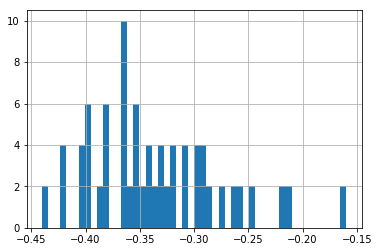

In [164]:
edge_df["cos_012"].hist(bins=50).plot()

In [165]:
edge_df

,atom_index_0,atom_index_1,single_0,double_0,triple_0,benzen_0,dist_0,g_angle_0,atom_index_2,single_1,double_1,triple_1,benzen_1,dist_1,g_angle_1,is_bond_0,is_bond_1,atom_x,x_0,y_0,z_0,atom_y,x_1,y_1,z_1,atom,x_2,y_2,z_2,cos_012_np,vec_x_0_1,vec_y_0_1,vec_z_0_1,vec_x_2_1,vec_y_2_1,vec_z_2_1,cos_012
0,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,2,1.0,0.0,0.0,0.0,1.553969,0.718102,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,-0.419795,-0.162934,1.508457,0.014870,0.810103,-0.556807,-1.203545,-0.419795
1,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,5,1.0,0.0,0.0,0.0,1.540524,0.559575,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,C,0.780005,-0.637238,1.198584,-0.440084,-0.162934,1.508457,0.014870,0.741141,-0.613743,1.203015,-0.440084
2,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,8,1.0,0.0,0.0,0.0,1.443926,-0.576517,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,O,-1.299356,-0.565446,0.015065,-0.273488,-0.162934,1.508457,0.014870,-1.338220,-0.541950,0.019497,-0.273488
3,2,1,1.0,0.0,0.0,0.0,1.553969,0.718102,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,1.0,1.0,C,0.848967,-0.580302,-1.207976,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,-0.419795,0.810103,-0.556807,-1.203545,-0.162934,1.508457,0.014870,-0.419795
4,2,1,1.0,0.0,0.0,0.0,1.553969,0.718102,5,1.0,0.0,0.0,0.0,1.540524,0.559575,1.0,1.0,C,0.848967,-0.580302,-1.207976,C,0.038864,-0.023495,-0.004431,C,0.780005,-0.637238,1.198584,-0.211262,0.810103,-0.556807,-1.203545,0.741141,-0.613743,1.203015,-0.211262
5,2,1,1.0,0.0,0.0,0.0,1.553969,0.718102,8,1.0,0.0,0.0,0.0,1.443926,-0.576517,1.0,1.0,C,0.848967,-0.580302,-1.207976,C,0.038864,-0.023495,-0.004431,O,-1.299356,-0.565446,0.015065,-0.359120,0.810103,-0.556807,-1.203545,-1.338220,-0.541950,0.019497,-0.359120
6,5,1,1.0,0.0,0.0,0.0,1.540524,0.559575,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,1.0,1.0,C,0.780005,-0.637238,1.198584,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,-0.440084,0.741141,-0.613743,1.203015,-0.162934,1.508457,0.014870,-0.440084
7,5,1,1.0,0.0,0.0,0.0,1.540524,0.559575,2,1.0,0.0,0.0,0.0,1.553969,0.718102,1.0,1.0,C,0.780005,-0.637238,1.198584,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,-0.211262,0.741141,-0.613743,1.203015,0.810103,-0.556807,-1.203545,-0.211262
8,5,1,1.0,0.0,0.0,0.0,1.540524,0.559575,8,1.0,0.0,0.0,0.0,1.443926,-0.576517,1.0,1.0,C,0.780005,-0.637238,1.198584,C,0.038864,-0.023495,-0.004431,O,-1.299356,-0.565446,0.015065,-0.285801,0.741141,-0.613743,1.203015,-1.338220,-0.541950,0.019497,-0.285801
9,8,1,1.0,0.0,0.0,0.0,1.443926,-0.576517,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,1.0,1.0,O,-1.299356,-0.565446,0.015065,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,-0.273488,-1.338220,-0.541950,0.019497,-0.162934,1.508457,0.014870,-0.273488


In [115]:
edge_df.groupby(["atom_index_0","atom_index_2"])["cos_012"].min().reset_index().head()

,atom_index_0,atom_index_2,cos_012
0,0,2,-0.462241
1,0,5,-0.462241
2,0,9,-0.342855
3,1,3,0.032680
4,1,6,-0.358483


あってそう

In [169]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [168]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [173]:
edge_df.sort_values(["atom_index_0","atom_index_1"])

,atom_index_0,atom_index_1,single_0,double_0,triple_0,benzen_0,dist_0,g_angle_0,atom_index_2,single_1,double_1,triple_1,benzen_1,dist_1,g_angle_1,is_bond_0,is_bond_1,atom_x,x_0,y_0,z_0,atom_y,x_1,y_1,z_1,atom,x_2,y_2,z_2,cos_012_np,vec_x_0_1,vec_y_0_1,vec_z_0_1,vec_x_2_1,vec_y_2_1,vec_z_2_1,cos_012
0,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,2,1.0,0.0,0.0,0.0,1.553969,0.718102,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,-0.419795,-0.162934,1.508457,0.014870,0.810103,-0.556807,-1.203545,-0.419795
1,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,5,1.0,0.0,0.0,0.0,1.540524,0.559575,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,C,0.780005,-0.637238,1.198584,-0.440084,-0.162934,1.508457,0.014870,0.741141,-0.613743,1.203015,-0.440084
2,0,1,1.0,0.0,0.0,0.0,1.517304,-0.584703,8,1.0,0.0,0.0,0.0,1.443926,-0.576517,1.0,1.0,C,-0.124070,1.484962,0.010439,C,0.038864,-0.023495,-0.004431,O,-1.299356,-0.565446,0.015065,-0.273488,-0.162934,1.508457,0.014870,-1.338220,-0.541950,0.019497,-0.273488
76,1,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,9,1.0,0.0,0.0,0.0,1.094076,0.881965,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,H,0.851343,1.976277,0.075108,-0.351292,0.162934,-1.508457,-0.014870,0.975413,0.491315,0.064669,-0.351292
77,1,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,10,1.0,0.0,0.0,0.0,1.094279,0.876095,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,H,-0.628209,1.827260,-0.898474,-0.352315,0.162934,-1.508457,-0.014870,-0.504139,0.342298,-0.908913,-0.352315
78,1,0,1.0,0.0,0.0,0.0,1.517304,-0.584703,11,1.0,0.0,0.0,0.0,1.093588,0.873746,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,-0.124070,1.484962,0.010439,H,-0.727986,1.792736,0.868631,-0.346786,0.162934,-1.508457,-0.014870,-0.603916,0.307774,0.858192,-0.346786
12,1,2,1.0,0.0,0.0,0.0,1.553969,0.718102,3,1.0,0.0,0.0,0.0,1.556302,0.802418,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,C,1.407461,-1.947892,-0.718226,-0.258218,-0.810103,0.556807,1.203545,0.558494,-1.367590,0.489751,-0.258218
13,1,2,1.0,0.0,0.0,0.0,1.553969,0.718102,12,1.0,0.0,0.0,0.0,1.093298,0.884659,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,H,0.215756,-0.663995,-2.095299,-0.354081,-0.810103,0.556807,1.203545,-0.633211,-0.083693,-0.887322,-0.354081
14,1,2,1.0,0.0,0.0,0.0,1.553969,0.718102,13,1.0,0.0,0.0,0.0,1.093657,0.884071,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,0.848967,-0.580302,-1.207976,H,1.657303,0.114717,-1.452159,-0.330525,-0.810103,0.556807,1.203545,0.808336,0.695019,-0.244183,-0.330525
48,1,5,1.0,0.0,0.0,0.0,1.540524,0.559575,4,1.0,0.0,0.0,0.0,1.533703,0.771507,1.0,1.0,C,0.038864,-0.023495,-0.004431,C,0.780005,-0.637238,1.198584,C,0.858282,-2.092695,0.721339,-0.159630,-0.741141,0.613743,-1.203015,0.078278,-1.455457,-0.477244,-0.159630


In [181]:
(lambda x: x.iloc[1] if len(x)>1 else np.nan).__name__

'<lambda>'

In [183]:
def second(x):
    return x.iloc[1] if len(x)>1 else np.nan
def third(x):
    return x.iloc[2] if len(x)>2 else np.nan
edge_df.groupby(["atom_index_0","atom_index_1"]).agg({"cos_012":["first",second, third]})

cos_012                    
                              first    second     third
atom_index_0 atom_index_1                              
0            1            -0.419795 -0.440084 -0.273488
1            0            -0.351292 -0.352315 -0.346786
             2            -0.258218 -0.354081 -0.330525
             5            -0.159630 -0.362009 -0.381955
             8            -0.403221       NaN       NaN
2            1            -0.419795 -0.211262 -0.359120
             3            -0.247605 -0.398971 -0.361768
3            2            -0.258218 -0.395976 -0.363465
             4            -0.218775 -0.383705 -0.395347
4            3            -0.247605 -0.363794 -0.328651
             5            -0.159630 -0.361985 -0.387608
             6            -0.381173       NaN       NaN
5            1            -0.440084 -0.211262 -0.285801
             4            -0.218775 -0.309464 -0.422987
6            4            -0.383705 -0.309464 -0.265626
             7            -0.403435 -0.341447 -0.290281
7            6            -0.381173       NaN       NaN
             8            -0.403221       NaN       NaN
8            1            -0.273488 -0.359120 -0.285801
             7            -0.403435 -0.342738 -0.290085
9            0            -0.351292 -0.319360 -0.319570
10           0            -0.352315 -0.319360 -0.309365
11           0            -0.346786 -0.319570 -0.309365
12           2            -0.354081 -0.395976 -0.295516
13           2            -0.330525 -0.363465 -0.295516
14           3            -0.398971 -0.363794 -0.296448
15           3            -0.361768 -0.328651 -0.296448
16           4            -0.395347 -0.422987 -0.265626
17           5            -0.362009 -0.361985 -0.336076
18           5            -0.381955 -0.387608 -0.336076
19           7            -0.341447 -0.342738 -0.327589
20           7            -0.290281 -0.290085 -0.327589

In [171]:
def second(x):
    if len(x)>1:
        return x.iloc[1]
    else:
        return np.nan

def third(x):
    if len(x)>2:
        return x.iloc[2]
    else:
        return np.nan
edge_df.groupby(["atom_index_0","atom_index_1"]).agg({"cos_012":["first", second, third]})

cos_012                    
                              first    second     third
atom_index_0 atom_index_1                              
0            1            -0.419795 -0.440084 -0.273488
1            0            -0.351292 -0.352315 -0.346786
             2            -0.258218 -0.354081 -0.330525
             5            -0.159630 -0.362009 -0.381955
             8            -0.403221       NaN       NaN
2            1            -0.419795 -0.211262 -0.359120
             3            -0.247605 -0.398971 -0.361768
3            2            -0.258218 -0.395976 -0.363465
             4            -0.218775 -0.383705 -0.395347
4            3            -0.247605 -0.363794 -0.328651
             5            -0.159630 -0.361985 -0.387608
             6            -0.381173       NaN       NaN
5            1            -0.440084 -0.211262 -0.285801
             4            -0.218775 -0.309464 -0.422987
6            4            -0.383705 -0.309464 -0.265626
             7            -0.403435 -0.341447 -0.290281
7            6            -0.381173       NaN       NaN
             8            -0.403221       NaN       NaN
8            1            -0.273488 -0.359120 -0.285801
             7            -0.403435 -0.342738 -0.290085
9            0            -0.351292 -0.319360 -0.319570
10           0            -0.352315 -0.319360 -0.309365
11           0            -0.346786 -0.319570 -0.309365
12           2            -0.354081 -0.395976 -0.295516
13           2            -0.330525 -0.363465 -0.295516
14           3            -0.398971 -0.363794 -0.296448
15           3            -0.361768 -0.328651 -0.296448
16           4            -0.395347 -0.422987 -0.265626
17           5            -0.362009 -0.361985 -0.336076
18           5            -0.381955 -0.387608 -0.336076
19           7            -0.341447 -0.342738 -0.327589
20           7            -0.290281 -0.290085 -0.327589

In [117]:
atom_meta = pd.read_pickle("../pickle/atomic_meta_train.pkl")

[]

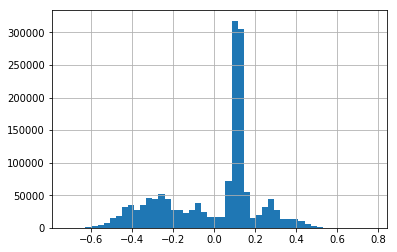

In [118]:
atom_meta["mulliken_charge"].hist(bins=50).plot()

In [119]:
mc = pd.read_csv("../data/train_ob_charges.csv")

In [120]:
mc.head()

,Unnamed: 0,molecule_name,atom_index,eem,mmff94,gasteiger,qeq,qtpie,eem2015ha,eem2015hm,eem2015hn,eem2015ba,eem2015bm,eem2015bn,error
0,0,dsgdb9nsd_000001,0,-0.644531,0.0,-0.077596,3.251140,-3.093807,0.014606,-0.813021,-0.784944,-0.067349,-0.806339,-0.851258,0
1,1,dsgdb9nsd_000001,1,0.161131,0.0,0.019399,-0.812772,0.773439,-0.003651,0.203254,0.196234,0.016837,0.201583,0.212813,0
2,2,dsgdb9nsd_000001,2,0.161132,0.0,0.019399,-0.812776,0.773442,-0.003651,0.203254,0.196235,0.016837,0.201584,0.212813,0
3,3,dsgdb9nsd_000001,3,0.161134,0.0,0.019399,-0.812797,0.773463,-0.003651,0.203256,0.196237,0.016837,0.201586,0.212816,0
4,4,dsgdb9nsd_000001,4,0.161134,0.0,0.019399,-0.812795,0.773462,-0.003651,0.203256,0.196237,0.016837,0.201586,0.212816,0


In [123]:
for c in [c for c in mc.columns if c not in ["molecule_name","atom_index","Unnamed: 0"]]:
    print(c,"                ", mc[c].std(), mc[c].max(),mc[c].min())

eem                  0.2710702680979549 0.9179969512583299 -1.0301224063991343
mmff94                  0.280372565925831 1.2309999999999999 -1.331
gasteiger                  0.19045209807062907 0.6348047517378026 -1.1338150942053669
qeq                  1.0567126166228415 7.727325083635563 -6.669373115509352
qtpie                  0.9322702767409663 5.769973849881552 -6.682612203947954
eem2015ha                  0.4572976405956769 1.8837585262555097 -1.7242926234430165
eem2015hm                  0.35615492087682143 1.2457923575413754 -1.1947971739026355
eem2015hn                  0.33241211805584214 1.1576804723993532 -1.4656314184592265
eem2015ba                  0.38886831585637904 1.5915790040635405 -1.590741781542199
eem2015bm                  0.36995445077504974 5.085932832417834 -4.550587783613179
eem2015bn                  0.3219224132239225 0.9992114082578228 -1.3550996509195086
error                  0.0 0 0
